Formula:

y = w0 + w1 x1 + ... + wn xn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import *

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
# Step 1: Select features
X = df[['RM', 'INDUS']]
y = df[['MEDV']]  # Notice it's double brackets to keep it as DataFrame

# Step 2: Standardize features, but keep as DataFrame
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = pd.DataFrame(sc_x.fit_transform(X), columns=X.columns)
y_std = pd.DataFrame(sc_y.fit_transform(y), columns=y.columns)

# Step 3: Fit model
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


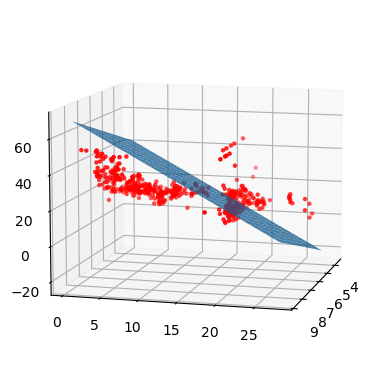

In [62]:
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plane = pd.DataFrame({"RM": X1.ravel(), "INDUS": X2.ravel()}) # Converts a multi-dimensional array into a one-dimensional array, essentially flattening it

pred = slr.predict(plane.values).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1,X2,pred,alpha=0.8)
ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color="red", marker=".") 
ax.view_init(elev=10,azim=15)

plt.show()